In [1]:
import os
import numpy as np
folders = os.listdir('.\\breast-histopathology-images\\8865')
folders_test = os.listdir('.\\breast-histopathology-images\\8913')

In [2]:
for f in folders:
    path = ".\\breast-histopathology-images\\8865/"+f
    print(f+str(len(os.listdir(path))))
    
for fi in folders_test:
    path_test = ".\\breast-histopathology-images\\8913/"+fi
    print(fi+str(len(os.listdir(path))))

0657
155
055
155


In [17]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [4]:
sample_path = ".\\breast-histopathology-images\\8865\\0\\8865_idx5_x51_y701_class0.png"
img = image.load_img(sample_path)

sample_path_test = ".\\breast-histopathology-images\\8913\\1\\8913_idx5_x401_y1151_class1.png"
img_test = image.load_img(sample_path_test)

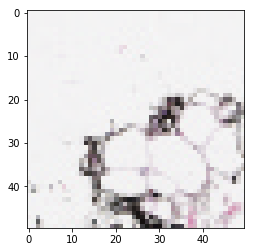

(1, 50, 50, 3)


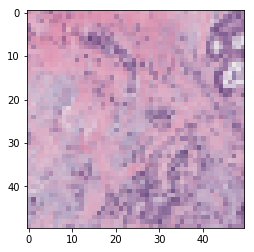

(1, 50, 50, 3)


In [5]:
#since it is image so we have to convert image to an array
x = image.img_to_array(img)
img_tensor = np.expand_dims(x,axis=0)
img_tensor = img_tensor/255.0
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

y = image.img_to_array(img_test)
img_tensor_test = np.expand_dims(y,axis=0)
img_tensor_test = img_tensor_test/255.0
plt.imshow(img_tensor_test[0])
plt.show()
print(img_tensor_test.shape)




In [16]:
from keras.layers import *
from keras.models import Sequential

In [48]:
#CNN model

model = Sequential()
model.add(Convolution2D(16,(3,3),activation='relu',input_shape = (50,50,3)))#32 filters each going to be 3*3 matrix 
#for first we have to give input_shape
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(16,(3,3),activation='relu'))#For all layers we dont need to specify input shape
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(16,(3,3),activation='relu'))#For all layers we dont need to specify input shape
model.add(MaxPooling2D(2,2))
model.add(Flatten())# its not a layer its just a reshaper function,it will make 3d volume to a linear layer
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2,activation = 'softmax'))#dense have value of 10 which means 10 neurons so we can predict output for 10 classes 
model.summary()

#we increase the no. pf filter for complex images ,so we increase the depth by this

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 9, 9, 16)          2320      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 256)             

In [42]:
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [47]:
model.compile(loss='binary_crossentropy',optimizer= 'adam' ,metrics=['accuracy'])

In [35]:
train_imagedata = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_imagedata = ImageDataGenerator(rescale=1./255)

In [36]:
#train_gen = ImageDataGenerator(rescale=1.0/255)#This the parameter we will apply to all images that is rescale image to 1/255,it will devide each pixel by 255
#val_gen = ImageDataGenerator(rescale=1.0/255)

training_set = \
    train_imagedata.flow_from_directory('.\\breast-histopathology-images\\8867/'
        , target_size=(48, 48), batch_size=32, class_mode='categorical')

val_set = \
    test_imagedata.flow_from_directory('.\\breast-histopathology-images\\8914/'
        , target_size=(48, 48), batch_size=32, class_mode='categorical')


#train_generator = train_datagen.flow_from_directory(".\\breast-histopathology-images\\8865/",
#                                               target_size = (50,50),
#                                               batch_size = 32,
#                                               class_mode = 'categorical')

#val_generator = test_datagen.flow_from_directory(".\\breast-histopathology-images\\8913/",
#                                               target_size = (50,50),
#                                               batch_size = 32,
#                                               class_mode = 'categorical')


#target size is the size of image we are targeting,batch size is how many images it will take in once,
#class_mode is needed for living part


Found 324 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [37]:
#train_generator.labels
#for x,y in train_generator:
#    x,y = train_generator.next()
#    print(x.shape,y.shape)
#    break

In [38]:
history=model.fit_generator(training_set, steps_per_epoch=2000, epochs=30,
                         validation_data=val_set,
                         validation_steps=30,)

Epoch 1/30
 608/2000 [========>.....................] - ETA: 56s - loss: 7.6501 - accuracy: 0.5000

KeyboardInterrupt: 

In [44]:
#Train our model 
#history = model.fit_generator(
#            train_generator,
#            epochs =10,
#            steps_per_epoch= 2000,
#            validation_data=val_generator,
#            validation_steps= 800)

In [45]:
model.evaluate_generator(val_set)

[-0.0, 0.9287749528884888]

In [46]:
model.save('model.h5')

In [47]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

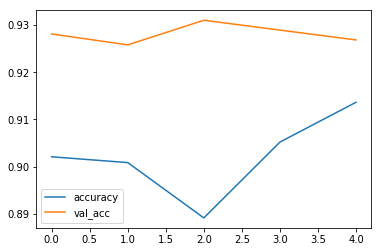

In [48]:
plt.plot(acc,label='accuracy')
plt.plot(val_acc,label='val_acc')
plt.legend()
plt.show()

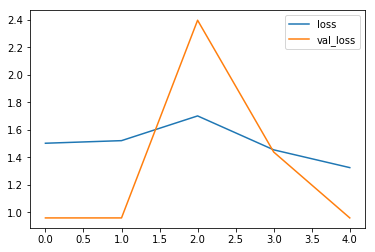

In [49]:
plt.plot(loss,label='loss')
plt.plot(val_loss,label= 'val_loss')
plt.legend()
plt.show()

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os

In [ ]:
import os 
folders = os.listdir("..\MinorProject\breast-histopathology-images\8867/")
print(folders)

image_data = []
labels = []


label_dict = {"noncancer":0,"cancer":1}

In [ ]:
from keras.preprocessing import image


for ix in folders:
    path = os.path.join("..\MinorProject\breast-histopathology-images\8867/",ix)
    print(path)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size=((224,224)))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[ix])

In [ ]:
import random
import numpy as np
combined = list(zip(image_data,labels))
random.shuffle(combined)

image_data[:],labels[:] = zip(*combined)

In [ ]:
print(labels[:15])#First five labels

In [ ]:
X_train = np.array(image_data)
Y_train = np.array(labels)


print(X_train.shape,Y_train.shape)

In [ ]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(Y_train)
print(X_train.shape)
print(Y_train.shape)

In [ ]:
#Create the resnet 50 model

from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model

import  matplotlib.pyplot as plt

In [ ]:
model = ResNet50(include_top = False,weights = None ,input_shape = (224,224,3))

In [ ]:
model.summary()

In [ ]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(2,activation='softmax')(d1)


model_new = Model(input = model.input,outputs = fc2)
model_new.summary()

In [ ]:
adam = Adam(lr = 0.00003)
model_new.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
for ix in range(len(model_new.layers)):
    print(ix,model_new.layers[ix])

In [ ]:
for ix in range(169):
    model_new.layers[ix].trainable = False
    
model_new.compile(loss='binary_crossentropy',optimizer = adam, metrics = ['accuracy'])
model_new.summary()

In [ ]:
hist = model_new.fit(X_train,Y_train,
                    shuffle=True,
                    batch_size=16,
                    epochs = 5,
                    validation_split=0.20
                    )

In [ ]:
from keras.applications.resnet50 import preprocess_input, decode_predictions
test_image = \
    image.load_img('../data/test/photo-1511919884226-fd3cad34687c.jpg'
                   , target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
training_set.class_indices
result

In [50]:
import numpy as np
test_image = \
    image.load_img('./test/8864_idx5_x51_y2201_class0.png',
                    target_size=(50,50))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis =0)
result = model.predict_classes(test_image)
result

array([[1]])

In [51]:
test_image = \
    image.load_img('./test/8864_idx5_x1851_y2451_class1.png',
                    target_size=(50,50))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis =0)
result = model.predict_classes(test_image)
result

array([[1]])

In [52]:
test_image = \
    image.load_img('./test/8864_idx5_x1801_y2451_class1.png',
                    target_size=(50,50))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis =0)
result = model.predict_classes(test_image)
result

array([[1]])

In [53]:
test_image = \
    image.load_img('./test/8864_idx5_x201_y2351_class0.png',
                    target_size=(50,50))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis =0)
result = model.predict_classes(test_image)
result

array([[1]])

In [54]:
test_image = \
    image.load_img('./test/8864_idx5_x201_y2301_class0.png',
                    target_size=(50,50))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis =0)
result = model.predict_classes(test_image)
result

array([[1]])

In [21]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 50, 50

# load the model we saved
model = load_model('model.h5')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# predicting images
img = image.load_img('./nonc.png', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print(classes)

[[1]]
